In [66]:
from legendre.data_utils.simple_path_utils import SimpleTrajDataset, SimpleTrajDataModule
from legendre.models.spline_cnode import evaluate_spline
import torch
import matplotlib.pyplot as plt

In [67]:
ds = SimpleTrajDataset(N = 100, Nt=200, Nobs = 10, noise_std = 0., irregular_rate = 1., spline_mode = True)

In [89]:
dm = SimpleTrajDataModule(batch_size = 16, seed = 421, N = 100, noise_std = 0., spline_mode = True, irregular_rate = 0.6)

In [90]:
dm.prepare_data()

In [91]:
dl = dm.train_dataloader()

In [92]:
for i,batch in enumerate(dl):
    times, Y, mask, label, coeffs = batch
    break

In [93]:
y_eval = []
for x_eval in torch.linspace(times[0],times[-1],100):
    y_eval.append(evaluate_spline(times, coeffs, x_eval))
y_eval = torch.stack(y_eval)

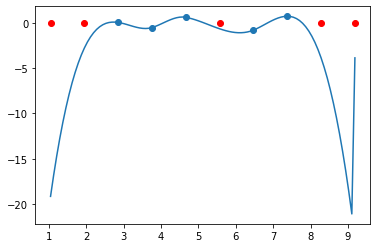

In [94]:
idx = 2
plt.plot(torch.linspace(times[0],times[-1],100),y_eval[:,idx])
plt.scatter(times[mask[idx].bool()],Y[idx][mask[idx].bool()])
plt.scatter(times[~mask[idx].bool()],Y[idx][~mask[idx].bool()], color = "red")

In [95]:
mask

tensor([[0., 1., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 0., 0., 1., 1., 0., 1., 1.],
        [0., 0., 1., 1., 1., 0., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0., 1., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
        [1., 0., 0., 1., 1., 1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 1., 1., 0., 1., 1., 0., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [0., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
        [0., 1., 0., 1., 1., 1., 1., 1., 1., 0.],
        [0., 0., 1., 0., 1., 1., 0., 1., 0., 1.],
        [0., 0., 1., 0., 1., 0., 1., 1., 1., 1.],
        [0., 1., 1., 0., 0., 1., 0., 1., 1., 0.]])

In [59]:
coeffs.shape

torch.Size([16, 4, 9])